<a href="https://colab.research.google.com/github/jiw3026/baseline_/blob/main/00_Selenium_colab(%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

In [ ]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

NanumGothic Eco


# selenium

웹 테스팅 패키지
- 웹브라우저에 접근해서 웹을 테스트하는데에 사용
- 웹 브라우저에 **직접** 접근할 수 있다는 점에서 크롤링하는데에도 유용하게 사용한다.

- bs4과 비교  
bs4: 정적으로 현재 웹페이지 상태를 가져온다.  
selenium: 동적으로 웹브라우저에 접근해서 페이지를 다룰 수 있다.

- 웹 드라이버 필요; 크롬 드라이버 설치하자.

#### selenium 기본 메서드

In [ ]:
from selenium import webdriver

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument(' --window-size= 1440, 1080')

NameError: ignored

In [ ]:
driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)

In [ ]:
driver.get('http://www.naver.com')

Selenium의 파싱 함수 정리  
1) find_element(By.X, ''): x를 이용해 element를 찾아줘  
2) find_elements(By.X, ''): x를 이용해 elements를 찾아줘  
  
- element == tag == data  
- x == 수식어 기준

### By.X

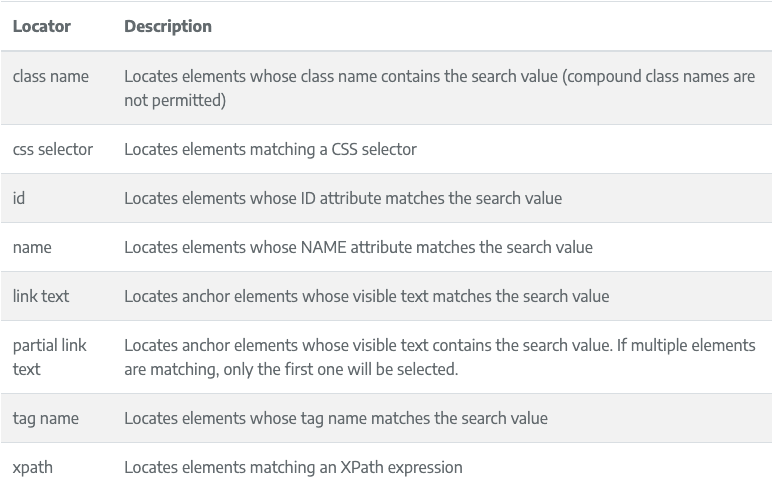

In [ ]:
url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=코로나'
driver.get(url)

In [ ]:
from selenium.webdriver.common.by import By

element = driver.find_element(By.ID, "sp_nws1")
element

<selenium.webdriver.remote.webelement.WebElement (session="553887aecac4862fbde7022d91de5765", element="9041f9b5-2ce5-40cf-a653-8d9f0dd4b187")>

In [ ]:
element.text

'문서 저장하기\n국민일보언론사 선정12시간 전네이버뉴스\n코로나 확진 아기, 약물 50배 투여 사망…간호사 영장\n코로나19에 확진된 13개월 영아에게 기준치 50배 약물을 과다 투여한 간호사에게 구속영장이 신청됐다. 해당... 경찰과 병원에 따르면 코로나19에 확진된 A양은 재택치료를 받던 중 호흡곤란 등 증상으로 지난 3월 11일...\n머니투데이언론사 선정2시간 전네이버뉴스\n코로나 확진 아이에 약물 50배 투여…숨지자 은폐한 간호사들\n세계일보언론사 선정6시간 전네이버뉴스\n‘코로나 치료제 과다투여’ 12개월 영아 사망 의혹…경찰, 간호사 3명 구속영...\nMBN4시간 전네이버뉴스\n코로나 확진 영아에 약물 50배 과다 투여…간호사 3명 구속영장'

In [ ]:
element.tag_name

'li'

In [ ]:
from selenium.webdriver.common.by import By

elements = driver.find_elements(By.CLASS_NAME, "keyword")
elements # 리스트로 리턴

[<selenium.webdriver.remote.webelement.WebElement (session="553887aecac4862fbde7022d91de5765", element="79c2b90f-ba95-45a6-8ce8-c68858ae0337")>,
 <selenium.webdriver.remote.webelement.WebElement (session="553887aecac4862fbde7022d91de5765", element="19949548-e2c5-436e-9fe5-0636b9cff2ac")>,
 <selenium.webdriver.remote.webelement.WebElement (session="553887aecac4862fbde7022d91de5765", element="ccc27708-ad32-433a-9000-e139124b7e46")>,
 <selenium.webdriver.remote.webelement.WebElement (session="553887aecac4862fbde7022d91de5765", element="cc012107-8f38-49fb-ab0e-ab01ab941195")>,
 <selenium.webdriver.remote.webelement.WebElement (session="553887aecac4862fbde7022d91de5765", element="4ce56040-9499-49be-885f-7d8ed6a28d7e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="553887aecac4862fbde7022d91de5765", element="d5dff349-ec06-49a2-bd70-57a83615b62a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="553887aecac4862fbde7022d91de5765", element="413a2a8b-b47e-4b9e-8bdf-e6

In [ ]:
for e in elements: 
    print(e.text)

코로나19
코로나 증상
코로나 생활지원금
코로나 지원금
코로나 검사
코로나 격리
코로나 재감염
코로나 변이
코로나확진자



## find_element_by_xpath, find_elements_by_xpath만으로도 충분하다.

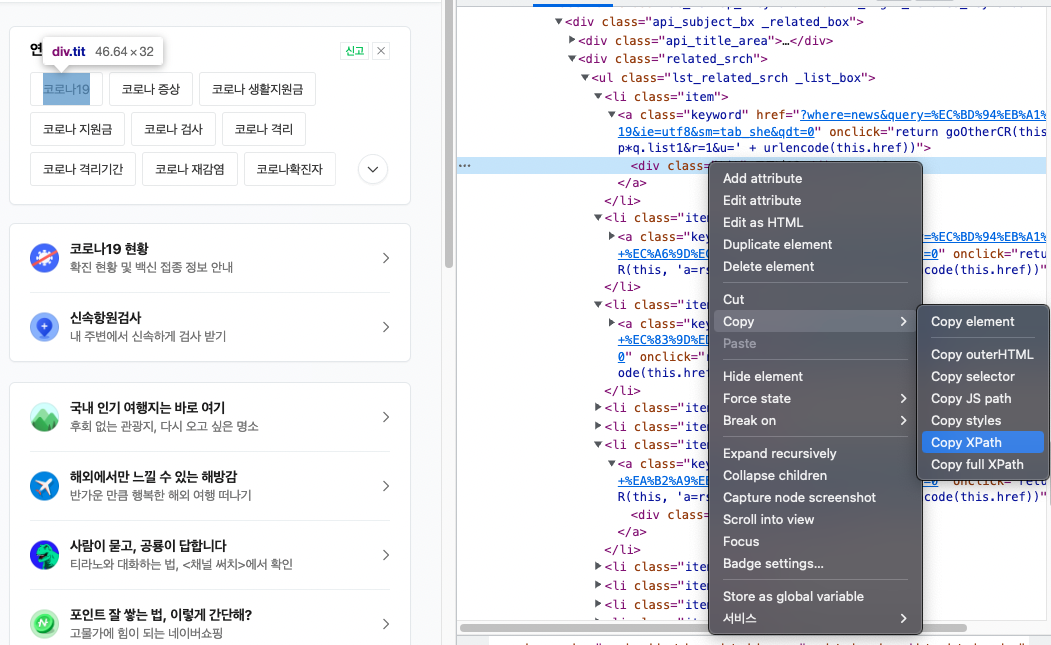

Xpath은 element(태그)의 경로를 기준으로 찾아주는 파싱 함수다.

In [ ]:
#xpath 연습
find_element(By.XPATH, '//*[@id="nx_right_related_keywords"]/div/div[2]/ul/li[1]/a/div')

find_elements(By.XPATH, '/html/body/div/table[1]/tbody/tr[3]/td')

find_elements(By.XPATH, '/html/body/div/table[1]/tbody/tr/td[2]')

#### xpath 기본 정리

1) 루트 태그와 루트가 아닌 태그
- 루트 태그 : /태그명 ex) /div -> 루트 div
- 루트가 아닌 태그 : //태그명 ex) //div -> 모든 div
  
2) //태그명[@속성명=속성값] ex) //div[@id='abc']

3) 태그명[3] -> 3번째 '태그명'태그 ex) a[3] -> 3번째 a
- 태그명[last()] -> 마지막 태그

4) 아스테리크 = \*(별) == (전부)   
ex) //div[@\*] = 어떤 속성이라도 가지고 있는 div  
ex) //table/tr/\* = 모든 tr

In [ ]:
element = driver.find_element(By.XPATH, "//a[@class='keyword']")
element.text

In [ ]:
# XPATH
element = driver.find_element(By.XPATH, '//*[@id="nx_right_related_keywords"]/div/div[2]/ul/li[1]/a/div')
element.text

In [ ]:
# Full XPATH 
element = driver.find_element(By.XPATH, '/html/body/div[3]/div[2]/div/div[2]/section[1]/div/div[2]/ul/li[1]/a/div')
element.text

모든 연관검색어를 다 가져오려면? 

In [ ]:
elements = driver.find_elements(By.XPATH, "//a[@class='keyword']")
for e in elements : 
    print(e.text, end = ' ')

In [ ]:
# 무엇이 달라졌나요? 
elements = driver.find_elements(By.XPATH, '//*[@id="nx_right_related_keywords"]/div/div[2]/ul/li/a/div')
for e in elements : 
    print(e.text, end = ' ')

## find_element_by_xpath, find_elements_by_xpath만으로도 충분하다.

quiz) xpath를 이용해서 뉴스기사제목이 담겨있는 a 태그를 읽어와보세요.

##### 풀이

In [ ]:
a_tag = driver.find_elements(By.XPATH, '//a[@class="news_tit"]')
a_tag[0].text, len(a_tag)

In [ ]:
print('-'*50)
elements = driver.find_elements(By.XPATH, '//a[@class="news_tit"]')
for e in elements : 
    print(e.text)

In [ ]:
print('-'*50)
elements = driver.find_elements(By.XPATH, '//a[@class="news_tit"]')
for e in elements : 
    print(e.get_attribute('href'))

### headless

굳이 브라우저를 띄우고 싶지는 않을 때, headless 기능을 사용한다.

In [ ]:
# options = webdriver.ChromeOptions()
# options.add_argument('headless')

In [ ]:
# driver = webdriver.Chrome(driver_path, 
#                           chrome_options=options)

# driver.get('http://www.naver.com')

## 그럼 이제 selenium을 제대로 활용해보자.  
selenium은 사람처럼 브라우저를 컨트롤할 수 있다. 사람처럼 클릭하고, 타이핑하고 등등

이럴 때, 셀레니움을 쓰면 된다.

사람이 직접 브라우저로 들어가면 쉬운데, requests/bs4로는 어려울 때    
사람이 직접 브라우저로 들어가듯 브라우저를 컨트롤하는 셀레니움을 쓰면 된다.

### 1. selenium의 기본 사용 코드는 다음과 같다.
#### (1) 엘레멘트 접근 방법
다양한 방법으로 엘레멘트에 접근할 수 있지만 주로 xpath를 사용한다.

주의 : class name에 띄어쓰기가 포함되어 있다면 띄어쓰기 대신 온점('.')으로 꼭 입력해주어야 한다.

(ex. 'sub_time suv_txt' => 'sub_time.suv_text' )

In [ ]:
url = 'https://www.naver.com'
driver.get(url)

In [ ]:
driver.find_element(By.LINK_TEXT, '아이디')

In [ ]:
# xpath
driver.find_element(By.XPATH, '/html/body/div[2]/div[2]/div[1]/div/div[3]/form/fieldset/button/span[2]')
# class속성
driver.find_element(By.CLASS_NAME, 'ico_search_submit')
# id속성
driver.find_element(By.ID, 'ke_kbd_btn')
# 링크가 있는 텍스트
driver.find_element(By.LINK_TEXT, '웹툰')
# css 셀렉터
driver.find_element(By.CSS_SELECTOR, '#account > div > a')
# name 속성
driver.find_element(By.NAME, 'query') 
# 링크가 있는 텍스트 일부
driver.find_element(By.PARTIAL_LINK_TEXT,'웹')
# 태그 이름
driver.find_element(By.TAG_NAME, 'input')

# <응용>
# 상위태그 + 하위태그
driver.find_element(By.CLASS_NAME, 'nav_item').find_element(By.TAG_NAME, 'a')


#### (2) 엘레멘트 클릭 / 텍스트 입력 & 삭제
검색창에 텍스트를 입력하고 버튼을 클릭하는 과정을 통해 url 입력 필요없이 다른 페이지로 넘어갈 수 있다.
- 엘레멘트 클릭 => click()
- 텍스트 입력 => send_keys()
- 텍스트 삭제 => clear()

In [ ]:
url = 'https://www.naver.com'
driver.get(url)

In [ ]:
# 텍스트 입력 
driver.find_element(By.CLASS_NAME, 'input_text').send_keys('코로나')
# 텍스트 삭제
driver.find_element(By.CLASS_NAME, 'input_text').clear() 

In [ ]:
from selenium.webdriver.common.keys import Keys
url = 'https://www.naver.com'
driver.get(url)

# 검색버튼 누르기
# 1번째 방법
driver.find_element(By.XPATH, '//*[@id="search_btn"]/span[2]').click()

# 2번째 방법
driver.get(url)
driver.find_element(By.CLASS_NAME, 'input_text').send_keys('코로나' + Keys.ENTER)

#### (3) 뒤로가기 or 앞으로가기
이전 페이지로 돌아가거나 앞 페이지로 갈 수 있다.

In [ ]:
# 뒤로가기
driver.back()

#앞으로 가기
driver.forward()

In [ ]:
from selenium.webdriver.common.keys import Keys
url = 'https://www.naver.com'
driver.get(url)

# 검색버튼 누르기
# 1번째 방법
driver.find_element(By.XPATH, '//*[@id="search_btn"]/span[2]').click()

# 2번째 방법
driver.back()
driver.find_element(By.CLASS_NAME, 'input_text').send_keys('코로나' + Keys.ENTER)

#### (4) 스크린샷 찍기
특정 엘레멘트의 스크린샷을 찍어 이미지 파일로 저장이 가능하다.

In [ ]:
driver.get(url)

#웹페이지 전체 캡쳐
driver.save_screenshot('webpage.png')

#특정 엘레먼트 캡쳐
element = driver.find_element(By.CLASS_NAME, 'ico_search_submit')

screenshot_as_bytes = element.screenshot_as_png
with open('element.png', 'wb') as f:
    f.write(screenshot_as_bytes)

In [ ]:
element.screenshot_as_png

### selenium의 한계와 활용

어디까지나 Selenium은 크롤링 전용 패키지가 아니기 때문에,   
크롤링을 할 때, 한계가 있다. 
예기치 못한 에러들이 종종 발생하는 등 불안정하다.  
이는 수차례 실습을 하다보면 경험을 통해 느낄 수 있다.  
셀레니움을 쓰다보면, 왜 에러나지? 어 왜 이제는 또 되지? 어 근데 결과가 왜 이러지? 어 왜 똑같은 페이지를 중복해서 가져오지? 왜지? 왜지?    
라는 상황이 참 빈번하게 나온다.  
그럼에도 어쩔 수 없이 쓰는 경우가 종종 있다.  


## 2. selenium으로 네이버에 직접 키워드 입력하여 뉴스기사 찾기

### 2-1.네이버 홈페이지에서 selenium을 이용하여 **검색창에 키워드를 입력**시킨 뒤 검색된 페이지로 넘어간다.

In [ ]:
import time

driver = webdriver.Chrome('chromedriver', options=chrome_options)

url = 'https://www.naver.com'

driver.get(url)

# 검색어 입력

# 검색버튼 누르기

time.sleep(3)

### 2-2.검색된 페이지에서 **연관검색어**를 찾는다.

### 2-3. 연관검색어가 있는 **엘레멘트를 캡쳐**해본다.
(한국어가 들어있는 엘레멘트 캡쳐시 한글 폰트 설치를 해주어야 한다. 설치 후에 런타임 다시 시작하기)

#### 한글폰트설치

#### 연관검색어 캡쳐하기
아래 코드를 실행한 뒤 저장된 파일을 열어보면 캡쳐된 연관검색어 이미지를 확인할 수 있다.

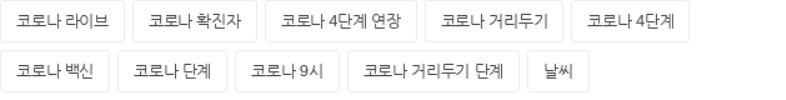

### 2-4. 페이지를 다시 **뒤로 돌아간 뒤**, 다른 키워드를 입력하고 연관검색어를 크롤링한다.

In [ ]:
# 뒤로가기
# >> 네이버 홈 화면으로 돌아감

# 검색어 입력

# 검색버튼 누르기


time.sleep(3)

# 연관검색어 찾기




### 2-5. 이번에는 키워드가 검색된 페이지에서 검색창에 있는 **검색어를 지운 뒤** 다른 키워드를 입력해서 검색해본다.

In [ ]:
# 기존 검색어 삭제

# 새로운 검색어 입력

# 검색 버튼 누르기


# 연관검색어 찾기


### 2-6. **find_by_element_by_link_text** 을 이용하여 연관검색어 중 하나의 연관검색어를 클릭한 뒤 그 연관검색어에 대한 또 다른 연관검색어를 크롤링해본다.
find_by_element_by_link_text 는 링크를 갖고 있는 (보여지는)텍스트 값을 이용해서 엘레멘트를 찾는 코드이다. 따라서 잘만 이용하면 xpath를 복사하는 것 보다 훨씬 수원해진다.

In [ ]:

# 연관검색어 찾기


print(keywords)

### 명시적 대기
위의 코드에서 time.sleep()코드가 몇 차례 들어가있는 것을 볼 수 있다.  
셀레니움은 브라우저를 직접 컨트롤하기 때문에, 페이지가 뜰 때까지 다음 코드를 대기시켜야 한다.  
이를 위해 명시적으로 대기를 걸어주는 것이다.

### 묵시적대기

그런데, 브라우저가 뜨는데 0.1초가 걸릴지, 3초가 걸릴지, 10초가 걸릴지 어떻게 알고 대기시간을 명시할까?  
그냥, 다음브라우저가 뜰때까지 묵시적으로 대기를 걸 수는 없을까? 있다.

driver = webdriver.Chrome(driver_path)  
아래에 driver.implicitly_wait(제한시간)만 주면,  
  
time.sleep(대기시간)을 모두!!!!!!!!!! 지워도 된다.

In [ ]:
# driver = webdriver.Chrome(driver_path)
driver.implicitly_wait(10)

url = 'https://comic.naver.com/webtoon/weekday'

driver.get(url)

thumbnails = driver.find_elements(By.XPATH, '//*[@id="content"]/div[4]/div[6]/div/ul/li/div/a/img')

In [ ]:
title = driver.find_element_by_xpath('//*[@id="timeTable"]/div[3]/div[1]/div/p')
print('영화 제목: {}'.format(title.text))
time = driver.find_element_by_xpath('//*[@id="mCSB_1_container"]/div[1]/ul[2]/li[1]/a/dl/dd[1]/strong')
seat = driver.find_element_by_xpath('//*[@id="mCSB_1_container"]/div[1]/ul[2]/li[1]/a/dl/dd[2]/strong')
print(time.text, seat.text)

## 네이버 로그인하기

In [ ]:
# driver_path = 'Webdriver/chromedriver.exe'
# driver = webdriver.Chrome(driver_path) #상대경로

url = 'https://nid.naver.com/nidlogin.login?url=https%3A%2F%2Fsell.smartstore.naver.com%2F%23%2FnaverLoginCallback%3Furl%3Dhttps%253A%252F%252Fsell.smartstore.naver.com%252F%2523'
driver.get(url)

In [ ]:
from getpass import getpass

myId = input('id :')
myPw = getpass('pw : ')

In [ ]:
from selenium.webdriver.common.keys import Keys


## Melon


In [ ]:
import requests
from bs4 import BeautifulSoup
# BS
url = 'https://www.melon.com/chart/index.htm'
resp = requests.get('https://www.melon.com/chart/index.htm')
soup = BeautifulSoup(resp.content, 'lxml')

soup.select('tr.lst50')

[]

In [ ]:
# Selenium
url = 'https://www.melon.com/chart/index.htm'
driver.get(url)

for e in driver.find_elements(By.CLASS_NAME, 'lst50'):
    print(e.text)

1
Nxde
(여자)아이들
I love
좋아요
81,492
2
새삥 (Prod. ZICO) (Feat. 호미들)
지코 (ZICO)
스트릿 맨 파이터(SMF) Original Vol.3 (계급미션)
좋아요
113,621
3
ANTIFRAGILE
LE SSERAFIM (르세라핌)
ANTIFRAGILE
좋아요
55,421
4
After LIKE
IVE (아이브)
After LIKE
좋아요
184,097
5
Hype boy
NewJeans
NewJeans 1st EP 'New Jeans'
좋아요
153,472
6
Rush Hour (Feat. j-hope of BTS)
Crush
Rush Hour
좋아요
72,632
7
Attention
NewJeans
NewJeans 1st EP 'New Jeans'
좋아요
175,256
8
Shut Down
BLACKPINK
BORN PINK
좋아요
95,135
9
사건의 지평선
윤하 (YOUNHA)
YOUNHA 6th Album Repackage 'END THEORY : Final Edition'
좋아요
76,187
10
Monologue
테이
Monologue
좋아요
40,240
11
Pink Venom
BLACKPINK
BORN PINK
좋아요
142,408
12
LOVE DIVE
IVE (아이브)
LOVE DIVE
좋아요
208,653
13
사랑은 늘 도망가
임영웅
신사와 아가씨 OST Part.2
좋아요
178,904
14
딱 10CM만
10CM, BIG Naughty (서동현)
딱 10CM만
좋아요
73,233
15
자격지심 (Feat. ZICO)
BE'O (비오)
FIVE SENSES
좋아요
42,301
16
우리들의 블루스
임영웅
IM HERO
좋아요
79,268
17
우린 그렇게 사랑해서
강민경 (다비치), 잔나비 최정훈
우린 그렇게 사랑해서
좋아요
43,070
18
1
다시 만날 수 있을까
임영웅
IM HERO
좋아요
62,867
19
1
그때 그 순간 그대로 (그그그)
WSG워너비 (가야G)
WSG워너비 1집


### 웹툰 댓글 크롤링

In [ ]:
driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


In [ ]:
# 웹툰 페이지로 이동
url = 'https://comic.naver.com/webtoon/detail?titleId=790713&no=70&weekday=fri'
driver.get(url)

In [ ]:
# 전체 댓글 페이지로 이동 (버튼 클릭)


클릭이 되지 않습니다! 왜일까요? 

In [ ]:
# 웹툰 댓글 iframe 요소로 이동


# 전체 댓글 페이지로 이동 (버튼 클릭)


In [ ]:
# (직접 해보세요!) 베스트 댓글 페이지로 이동(버튼 클릭)


In [ ]:
# BeautifulSoup로 가져오기
from bs4 import BeautifulSoup
r = driver.page_source 
soup = BeautifulSoup(r, 'html.parser')

In [ ]:
# 댓글 내용 


[<span class="u_cbox_contents" data-lang="ko" style="">이게 무슨 신데렐라가 왕자만나려고 유리구두 만들다가 결국 20년된 유리장인된거야 뭐야 결말이 이상해</span>]

In [ ]:
# time


'2022-10-10T23:07:58+0900'

In [ ]:
# sympathyCount


'6145'

In [ ]:
# antipayhyCount


'11'

In [ ]:
import pandas as pd 

dic_comm = {
    'content' : [],
    'time' : [],
    'sympathyCount' : [],
    'antipayhyCount' : []
}


pd.DataFrame(dic_comm)

,content,time,sympathyCount,antipayhyCount
0,이게 무슨 신데렐라가 왕자만나려고 유리구두 만들다가 결국 20년된 유리장인된거야 뭐...,2022-10-10T23:07:58+0900,6145,11
1,이정도면 대체 두분 회사에서 어떻게 친해지신거에욬ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,2022-10-10T23:00:11+0900,4607,8
2,"10년차, 9년차 왕고들의 사랑을 받는 막내 병아리라...",2022-10-10T23:04:04+0900,3892,9
3,띵언이다,2022-10-10T23:01:13+0900,3287,10
4,이상한 석사생 요다요,2022-10-10T23:02:07+0900,3131,3
5,아 밤과자 얻어먹어놓고 왜 버리시냐고요ㅋㅋㅋㅋㅋㅋ,2022-10-10T23:19:55+0900,2867,3
6,심리적 안정감 때문 아닐까요 ㅋㅋㅋㅋㅋ 대학원생 시절에는 모든게 각박해서 못챙겨주다...,2022-10-10T23:08:00+0900,2511,3
7,캐비아도 1g에 100만원인데 도대체 뭘 쓰는겁니까?,2022-10-10T23:05:00+0900,2272,6
8,논문가지고 비트코인을 하누...,2022-10-10T23:32:28+0900,2198,10
9,'밤과자 바치며'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ결국 뇌물엔딩이잖아요,2022-10-10T23:08:31+0900,2120,3
